# Computer Vision
# Jacobs University Bremen
# Fall 2021
# Homework 4

*This notebook includes both coding and written questions. Please hand in this notebook file with all the outputs and your answers to the written questions.*

This assignment covers K-Means and HAC methods for clustering and image segmentation.

In [274]:
# Setup
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from skimage import io

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Introduction
In this assignment, you will use clustering algorithms to segment images. You will then use these segmentations to identify foreground and background objects.

Your assignment will involve the following subtasks:
- **Clustering algorithms**: Implement K-Means clustering and Hierarchical Agglomerative Clustering.
- **Pixel-level features**: Implement a feature vector that combines color and position information and implement feature normalization.
- **Quantitative Evaluation**: Evaluate segmentation algorithms with a variety of parameter settings by comparing your computed segmentations against a dataset of ground-truth segmentations.

## 1 Clustering Algorithms (40 points)

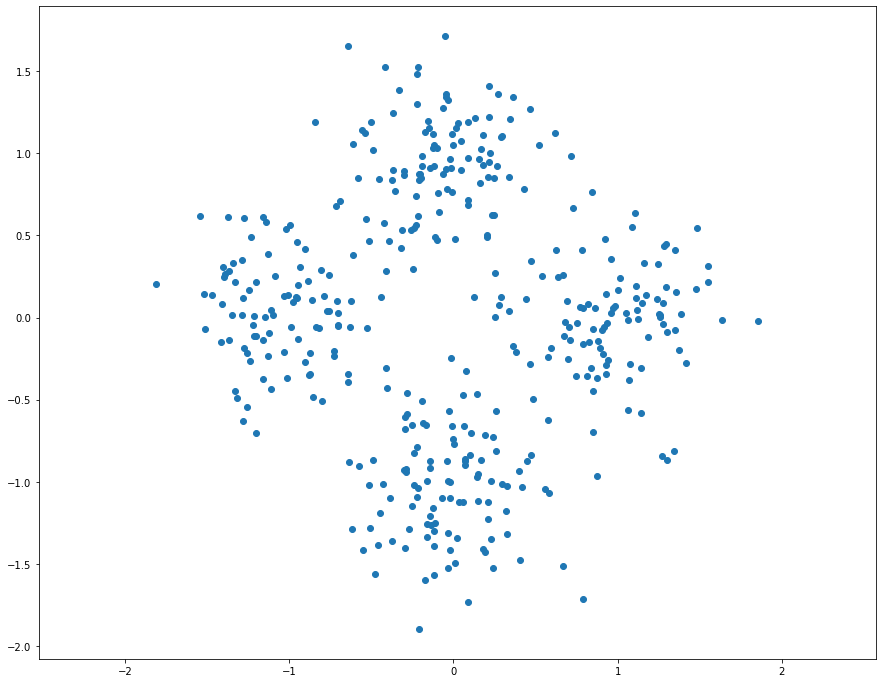

In [275]:
# Generate random data points for clustering

# Set seed for consistency
np.random.seed(0)

# Cluster 1
mean1 = [-1, 0]
cov1 = [[0.1, 0], [0, 0.1]]
X1 = np.random.multivariate_normal(mean1, cov1, 100)

# Cluster 2
mean2 = [0, 1]
cov2 = [[0.1, 0], [0, 0.1]]
X2 = np.random.multivariate_normal(mean2, cov2, 100)

# Cluster 3
mean3 = [1, 0]
cov3 = [[0.1, 0], [0, 0.1]]
X3 = np.random.multivariate_normal(mean3, cov3, 100)

# Cluster 4
mean4 = [0, -1]
cov4 = [[0.1, 0], [0, 0.1]]
X4 = np.random.multivariate_normal(mean4, cov4, 100)

# Merge two sets of data points
X = np.concatenate((X1, X2, X3, X4))

# Plot data points
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

### 1.1 K-Means Clustering (20 points)
As discussed in class, K-Means is one of the most popular clustering algorithms. We have provided skeleton code for K-Means clustering in the file `segmentation.py`. Your first task is to finish implementing **`kmeans`** in `segmentation.py`. This version uses nested for loops to assign points to the closest centroid and compute a new mean for each cluster.

kmeans running time: 0.047639 seconds.


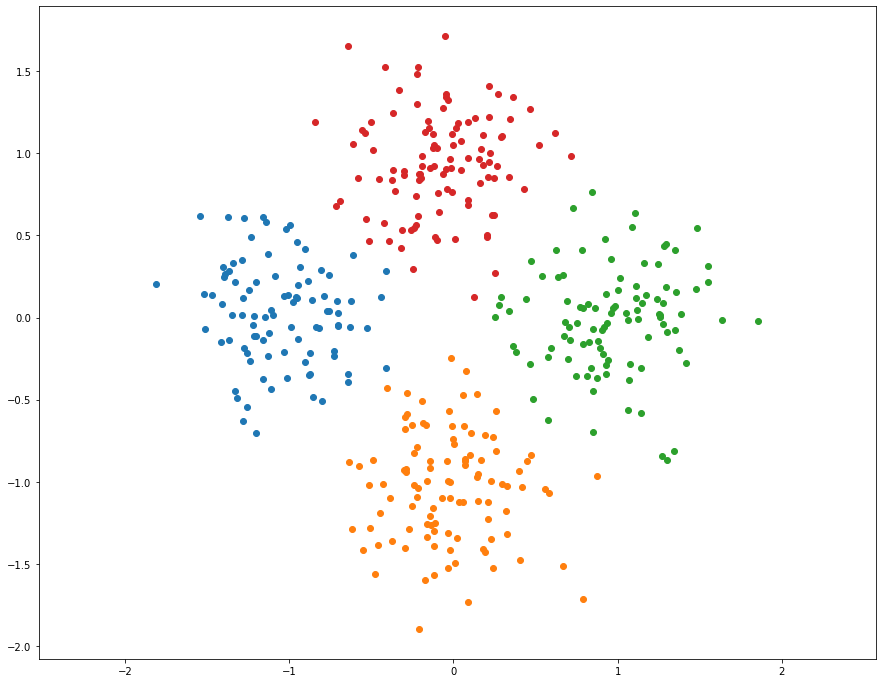

In [276]:
from segmentation import kmeans

np.random.seed(0)
start = time()
assignments = kmeans(X, 4)
end = time()

kmeans_runtime = end - start

print("kmeans running time: %f seconds." % kmeans_runtime)

for i in range(4):
    cluster_i = X[assignments==i]
    plt.scatter(cluster_i[:, 0], cluster_i[:, 1])

plt.axis('equal')
plt.show()

We can use numpy functions and broadcasting to make K-Means faster. Implement **`kmeans_fast`** in `segmentation.py`. This should run at least 10 times faster than the previous implementation.

kmeans running time: 0.002914 seconds.
16.347296 times faster!


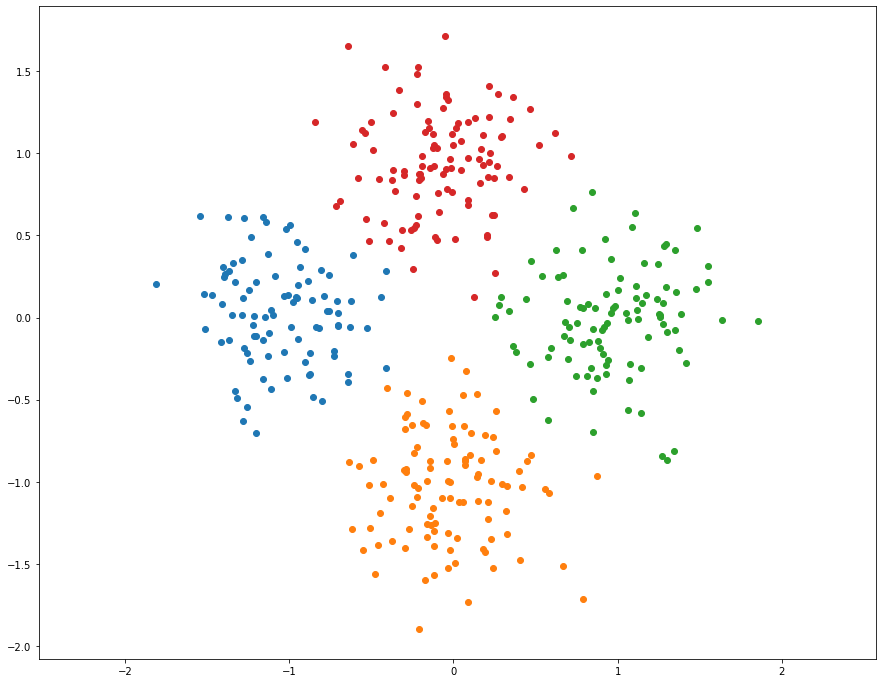

In [277]:
from segmentation import kmeans_fast

np.random.seed(0)
start = time()
assignments = kmeans_fast(X, 4)
end = time()

kmeans_fast_runtime = end - start
print("kmeans running time: %f seconds." % kmeans_fast_runtime)
print("%f times faster!" % (kmeans_runtime / kmeans_fast_runtime))

for i in range(4):
    cluster_i = X[assignments==i]
    plt.scatter(cluster_i[:, 0], cluster_i[:, 1])

plt.axis('equal')
plt.show()

### 1.2 K-Means Convergence (10 points)
Implementations of the K-Means algorithm will often have the parameter `num_iters` to define the maximum number of iterations the algorithm should run for. Consider that we opt to not include this upper bound on the number of iterations, and that we define the termination criterion of the algorithm to be when the cost $L$ stops changing.

Recall that $L$ is defined as the sum of squared distance between all points $x$ and their nearest cluster center $c$:

$$L = \sum_{i \in clusters}\sum_{x \in cluster_i} (x - c_i)^2$$

Show that for any set of points **$D$** and any number of clusters $k$, the K-Means algorithm will terminate in a finite number of iterations.

**Your answer here:**

To prove convergence of the K-means algorithm, we show that the loss function is guaranteed to decrease monotonically in each iteration until convergence for the assignment step and for the refitting step. Since the loss function is non-negative, the algorithm will eventually converge when the loss function reaches its (local) minimum.
Let $z=\left(z_{1}, \ldots, z_{n}\right)$ denote the cluster assignments for the $n$ points.

(i) Assignment step

We can write down the original loss function $L(\mu)$ as follows:

$$
L(\mu, z)=\sum_{i=1}^{n}\left\|x_{i}-\mu_{z_{i}}\right\|_{2}^{2}
$$

Let us consider a data point $x_{i}$, and let $z_{i}$ be the assignment from the previous iteration and $z_{i}^{*}$ be the new assignment obtained as:

$$
z_{i}^{*} \in \arg \min _{j \in\{1, \ldots, k\}}\left\|x_{i}-\mu_{j}\right\|_{2}^{2}
$$

Let $z^{*}$ denote the new cluster assignments for all the $n$ points. The change in loss function after this assignment step is then given by:

$$
L\left(\mu, z^{*}\right)-L(\mu, z)=\sum_{i=1}^{n}\left(\left\|x_{i}-\mu_{z_{i}}\right\|_{2}^{2}-\left\|x_{i}-\mu_{z_{i}}\right\|_{2}^{2}\right) \leq 0
$$

The inequality holds by the rule $z_{i}^{*}$ is determined, i.e. to assign $x_{i}$ to the nearest cluster.

(ii) Refitting step

We can write down the original loss function $L(\mu)$ as follows:

$$
L(\mu, z)=\sum_{j=1}^{k}\left(\sum_{i: z_{i}=j}\left\|x_{i}-\mu_{j}\right\|_{2}^{2}\right)
$$

Let us consider the $j^{\text {th }}$ cluster, and let $\mu_{j}$ be the cluster center from the previous iteration and $\mu_{j}^{*}$ be the new cluster center obtained as:

$$
\mu_{j}^{*}=\frac{1}{\left|\left\{i: z_{i}=j\right\}\right|} \sum_{i: z_{i}=j} x_{i}
$$

Let $\mu^{*}$ denote the new cluster centers for all the $k$ clusters. The change in loss function after this refitting step is then given by:

$$
L\left(\mu^{*}, z\right)-L(\mu, z)=\sum_{j=1}^{k}\left(\left(\sum_{i: z_{i}=j}\left\|x_{i}-\mu_{j}^{*}\right\|_{2}^{2}\right)-\left(\sum_{i: z_{i}=j}\left\|x_{i}-\mu_{j}\right\|_{2}^{2}\right)\right) \leq 0
$$

The inequality holds because the update rule of $\mu_{j}^{*}$ essentially minimizes this quantity. Therefore, the k-means algorithm will terminate in a finite number of iteration.


### 1.2 Hierarchical Agglomerative Clustering (10 points)
Another simple clustering algorithm is Hieararchical Agglomerative Clustering, which is somtimes abbreviated as HAC. In this algorithm, each point is initially assigned to its own cluster. Then cluster pairs are merged until we are left with the desired number of predetermined clusters (see Algorithm 1).

Implement **`hiererachical_clustering`** in `segmentation.py`.

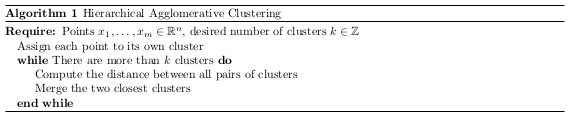

hierarchical_clustering running time: 0.092066 seconds.


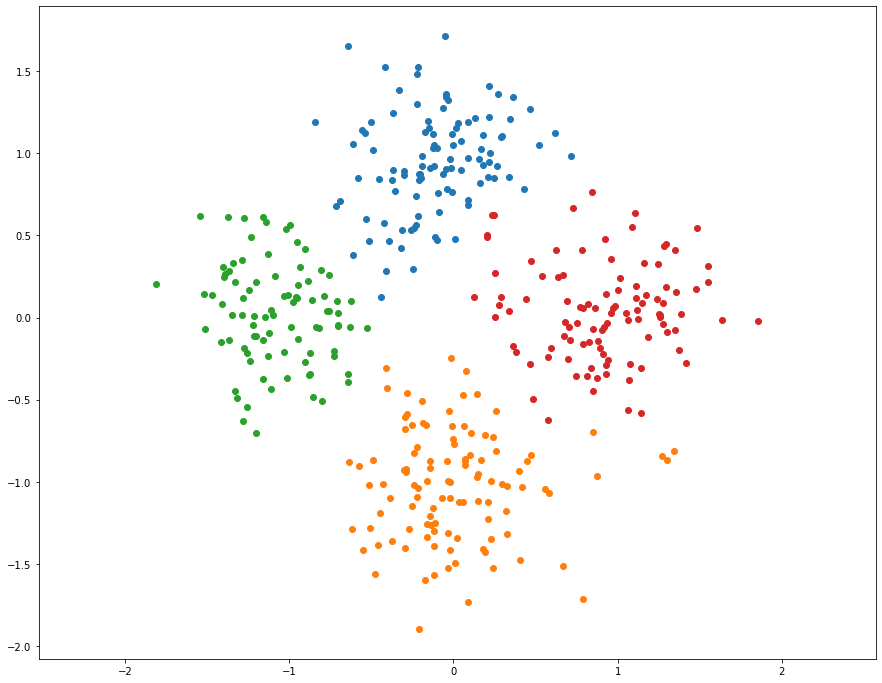

In [278]:
from segmentation import hierarchical_clustering

start = time()
assignments = hierarchical_clustering(X, 4)
end = time()

print("hierarchical_clustering running time: %f seconds." % (end - start))

for i in range(4):
    cluster_i = X[assignments==i]
    plt.scatter(cluster_i[:, 0], cluster_i[:, 1])

plt.axis('equal')
plt.show()

## 2 Pixel-Level Features (30 points)
Before we can use a clustering algorithm to segment an image, we must compute some *feature vector* for each pixel. The feature vector for each pixel should encode the qualities that we care about in a good segmentation. More concretely, for a pair of pixels $p_i$ and $p_j$ with corresponding feature vectors $f_i$ and $f_j$, the distance between $f_i$ and $f_j$ should be small if we believe that $p_i$ and $p_j$ should be placed in the same segment and large otherwise.

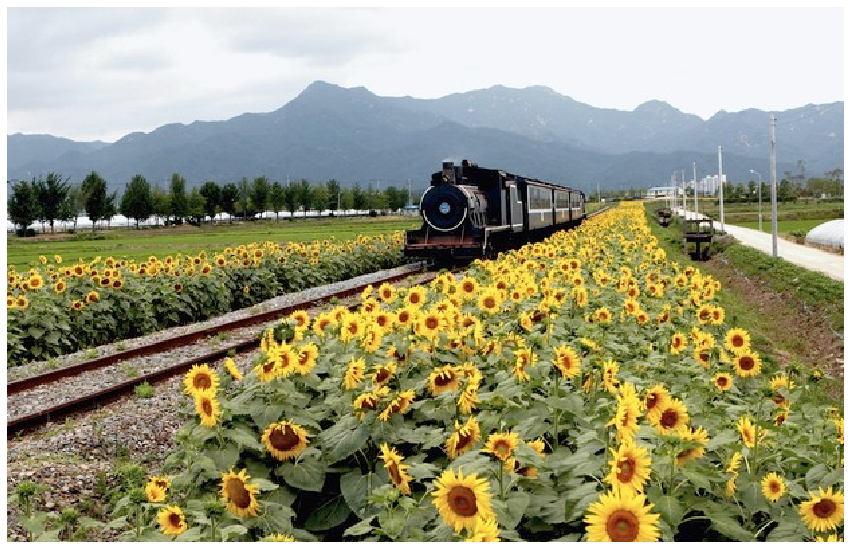

In [279]:
# Load and display image
img = io.imread('train.jpg')
H, W, C = img.shape

plt.imshow(img)
plt.axis('off')
plt.show()

### 2.1 Color Features (15 points)
One of the simplest possible feature vectors for a pixel is simply the vector of colors for that pixel. Implement **`color_features`** in `segmentation.py`. Output should look like the following:
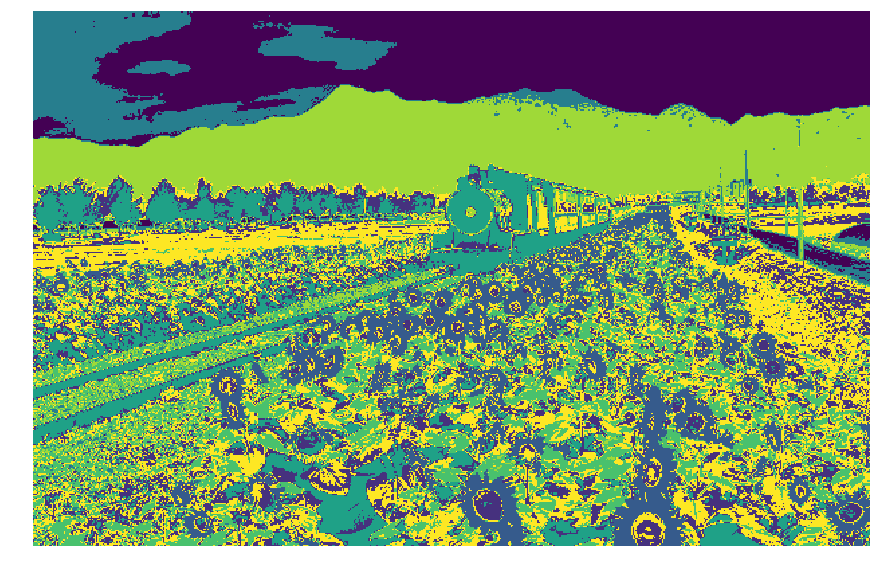

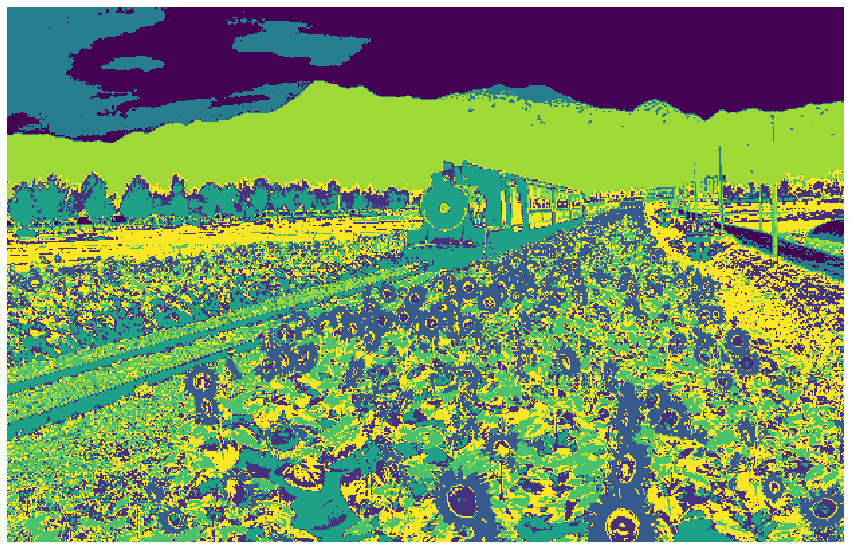

In [280]:
from segmentation import color_features
np.random.seed(0)

features = color_features(img)

# Sanity checks
assert features.shape == (H * W, C),\
    "Incorrect shape! Check your implementation."

assert features.dtype == np.float,\
    "dtype of color_features should be float."

assignments = kmeans_fast(features, 8)
segments = assignments.reshape((H, W))

# Display segmentation
plt.imshow(segments, cmap='viridis')
plt.axis('off')
plt.show()

In the cell below, we visualize each segment as the mean color of pixels in the segment.

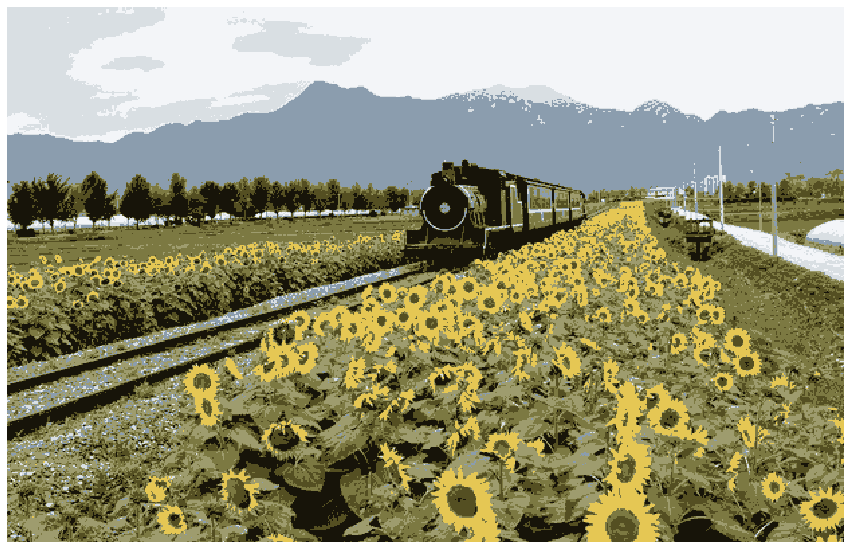

In [281]:
from utils import visualize_mean_color_image
visualize_mean_color_image(img, segments)

### 2.2 Color and Position Features (15 points)
Another simple feature vector for a pixel is to concatenate its color and position within the image. In other words, for a pixel of color $(r, g, b)$ located at position $(x, y)$ in the image, its feature vector would be $(r, g, b, x, y)$. However, the color and position features may have drastically different ranges; for example each color channel of an image may be in the range $[0, 1)$, while the position of each pixel may have a much wider range. Uneven scaling between different features in the feature vector may cause clustering algorithms to behave poorly.

One way to correct for uneven scaling between different features is to apply some sort of normalization to the feature vector. One of the simplest types of normalization is to force each feature to have zero mean and unit variance.

Implement **`color_position_features`** in `segmentation.py`.

Output segmentation should look like the following:
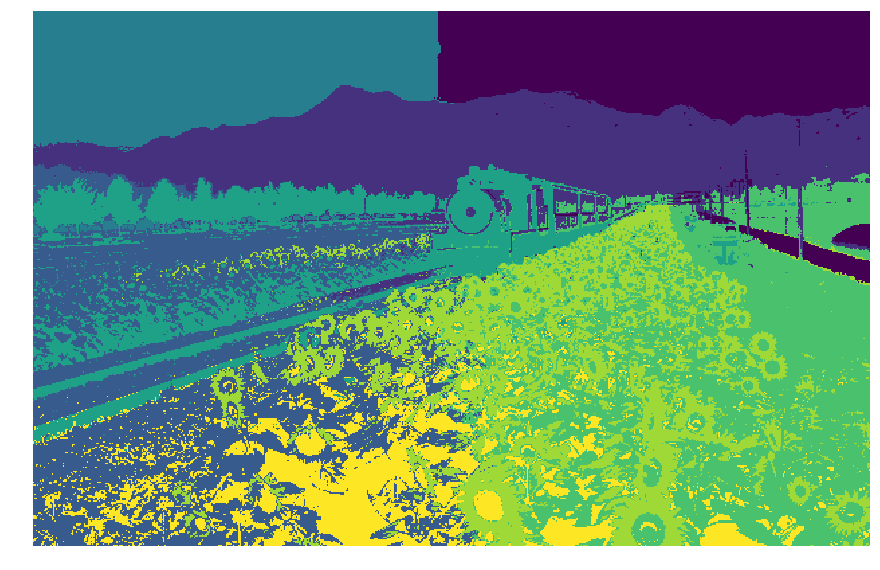

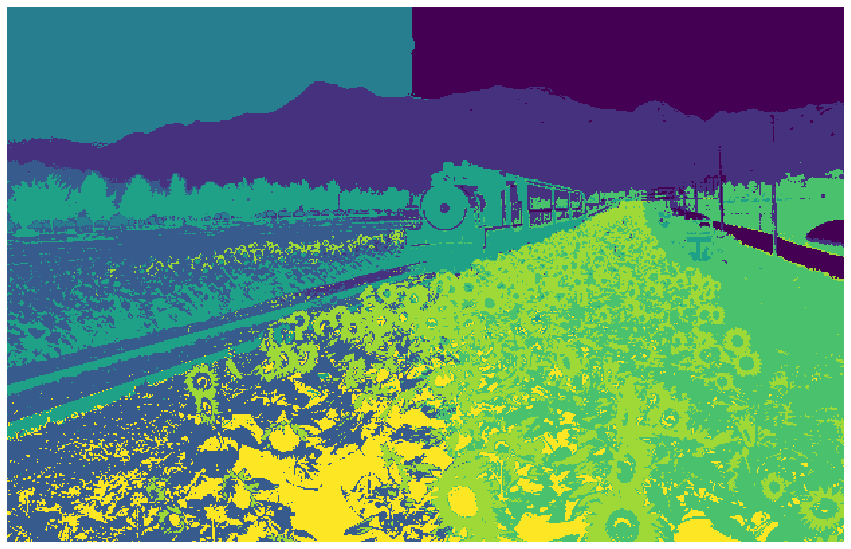

In [282]:
from segmentation import color_position_features
np.random.seed(0)

features = color_position_features(img)

# Sanity checks
assert features.shape == (H * W, C + 2),\
    "Incorrect shape! Check your implementation."

assert features.dtype == np.float,\
    "dtype of color_features should be float."

assignments = kmeans_fast(features, 8)
segments = assignments.reshape((H, W))

# Display segmentation
plt.imshow(segments, cmap='viridis')
plt.axis('off')
plt.show()

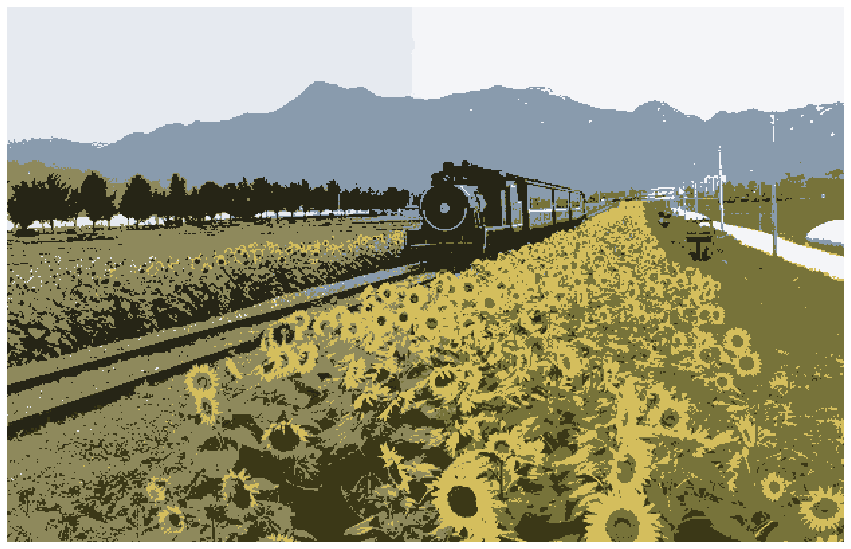

In [283]:
visualize_mean_color_image(img, segments)

### Extra Credit: Implement Your Own Feature
For this programming assignment we have asked you to implement a very simple feature transform for each pixel. While it is not required, you should feel free to experiment with other feature transforms. Could your final segmentations be improved by adding gradients, edges, SIFT descriptors, or other information to your feature vectors? Could a different type of normalization give better results?

Implement your feature extractor **`my_features`** in `segmentation.py`

Depending on the creativity of your approach and the quality of your writeup, implementing extra feature vectors can be worth extra credit (up to 1 point).

**Describe your approach**: (YOUR APPROACH)

In [284]:
from segmentation import my_features

# Feel free to experiment with different images
# and varying number of segments
img = io.imread('train.jpg')
num_segments = 8

H, W, C = img.shape

# Extract pixel-level features
#features = my_features(img)

# Run clustering algorithm
#assignments = kmeans_fast(features, num_segments)

#segments = assignments.reshape((H, W))

# Display segmentation
#plt.imshow(segments, cmap='viridis')
#plt.axis('off')
#plt.show()

## 3 Quantitative Evaluation (30 points)

Looking at images is a good way to get an idea for how well an algorithm is working, but the best way to evaluate an algorithm is to have some quantitative measure of its performance.

For this project we have supplied a small dataset of cat images and ground truth segmentations of these images into foreground (cats) and background (everything else). We will quantitatively evaluate different segmentation methods (features and clustering methods) on this dataset.

We can cast the segmentation task into a binary classification problem, where we need to classify each pixel in an image into either foreground (positive) or background (negative). Given the ground-truth labels, the accuracy of a segmentation is $(TP+TN)/(P+N)$.

Implement **`compute_accuracy`** in `segmentation.py`.

Accuracy: 0.97


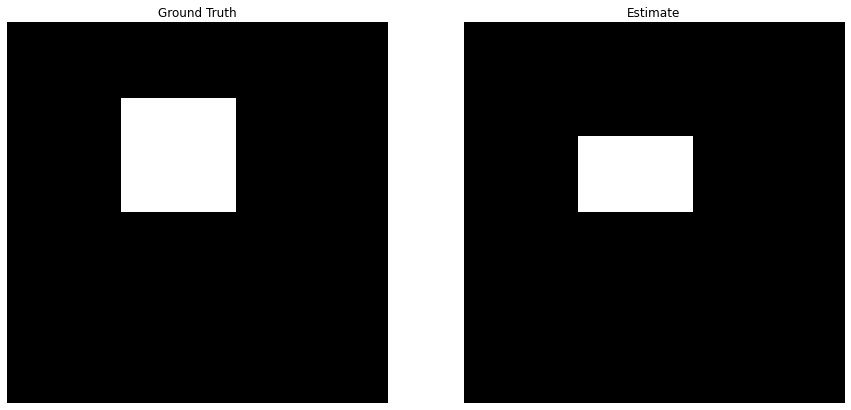

In [285]:
from segmentation import compute_accuracy

mask_gt = np.zeros((100, 100))
mask = np.zeros((100, 100))

# Test compute_accracy function
mask_gt[20:50, 30:60] = 1
mask[30:50, 30:60] = 1

accuracy = compute_accuracy(mask_gt, mask)

print('Accuracy: %0.2f' % (accuracy))
if accuracy != 0.97:
    print('Check your implementation!')

plt.subplot(121)
plt.imshow(mask_gt)
plt.title('Ground Truth')
plt.axis('off')

plt.subplot(122)
plt.imshow(mask)
plt.title('Estimate')
plt.axis('off')

plt.show()

You can use the script below to evaluate a segmentation method’s ability to separate foreground from background on the entire provided dataset. Use this script as a starting point to evaluate a variety of segmentation parameters.

In [286]:
from utils import load_dataset, compute_segmentation
from segmentation import evaluate_segmentation

# Load a small segmentation dataset
imgs, gt_masks = load_dataset('./data')

# Set the parameters for segmentation.
num_segments = [2,3,4]
clustering_fn = kmeans_fast
feature_fn = [color_features, color_position_features]
scales =  [0.25,0.5,0.75]

mean_accuracy = 0.0

segmentations = []


for feature in feature_fn:
        for num_segment in num_segments:
            for scale in scales:
                for i, (img, gt_mask) in enumerate(zip(imgs, gt_masks)):
                    # Compute a segmentation for this image
                    segments = compute_segmentation(img, num_segment,
                                                    clustering_fn,
                                                    feature,
                                                    scale=scale)
                    
                    #What was originally being displayed with this code block before I modified it
                    if scale == 0.5 and num_segment == 3 and feature == color_features:
                        segmentations.append(segments)

                    # Evaluate segmentation
                    accuracy = evaluate_segmentation(gt_mask, segments)
                    mean_accuracy += accuracy

                mean_accuracy = mean_accuracy / len(imgs)
                print('Mean accuracy for {} using {} with scale {} and number of segments {} : {:.4f}'.format(clustering_fn.__name__, feature.__name__, scale, num_segment, mean_accuracy))
            
print("Successfully computed Mean accuracy for a total of", len(segmentations), "combinations!")

Mean accuracy for kmeans_fast using color_features with scale 0.25 and number of segments 2 : 0.7654
Mean accuracy for kmeans_fast using color_features with scale 0.5 and number of segments 2 : 0.8111
Mean accuracy for kmeans_fast using color_features with scale 0.75 and number of segments 2 : 0.8133
Mean accuracy for kmeans_fast using color_features with scale 0.25 and number of segments 3 : 0.8201
Mean accuracy for kmeans_fast using color_features with scale 0.5 and number of segments 3 : 0.8402
Mean accuracy for kmeans_fast using color_features with scale 0.75 and number of segments 3 : 0.8442
Mean accuracy for kmeans_fast using color_features with scale 0.25 and number of segments 4 : 0.8173
Mean accuracy for kmeans_fast using color_features with scale 0.5 and number of segments 4 : 0.8230
Mean accuracy for kmeans_fast using color_features with scale 0.75 and number of segments 4 : 0.8351
Mean accuracy for kmeans_fast using color_position_features with scale 0.25 and number of segm

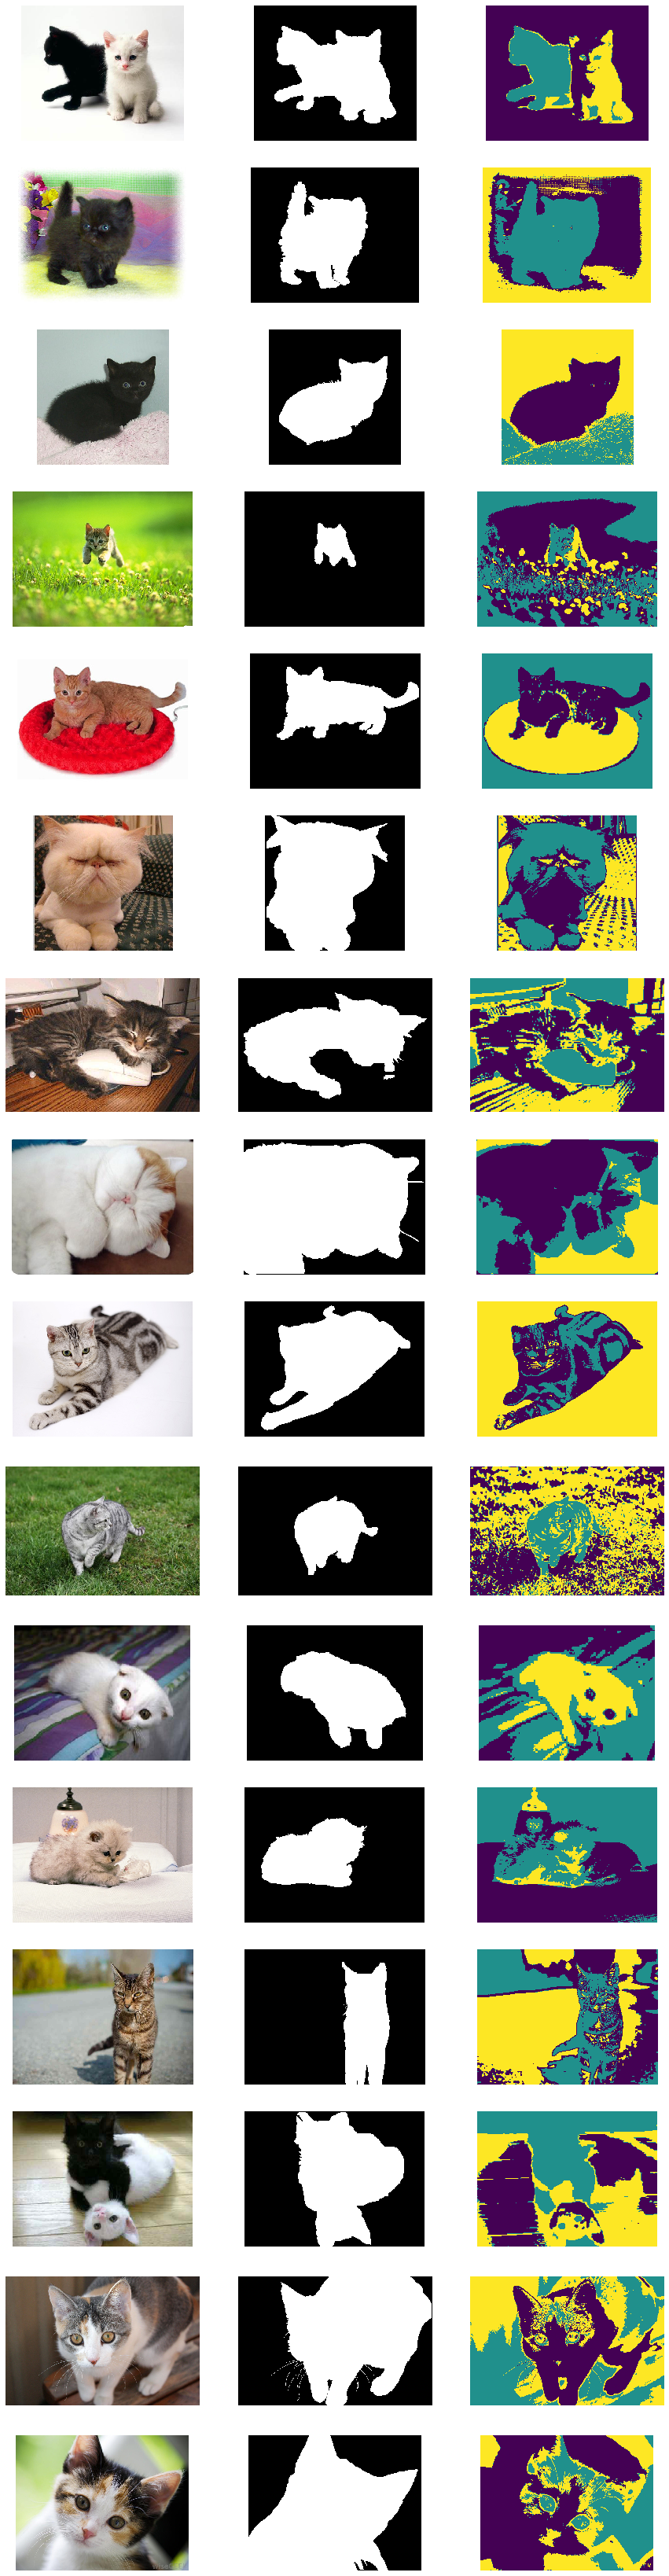

In [287]:
# Visualize segmentation results

N = len(imgs)
plt.figure(figsize=(15,60))
for i in range(N):

    plt.subplot(N, 3, (i * 3) + 1)
    plt.imshow(imgs[i])
    plt.axis('off')

    plt.subplot(N, 3, (i * 3) + 2)
    plt.imshow(gt_masks[i])
    plt.axis('off')

    plt.subplot(N, 3, (i * 3) + 3)
    plt.imshow(segmentations[i], cmap='viridis')
    plt.axis('off')

plt.show()

Include a detailed evaluation of the effect of varying segmentation parameters (feature transform, clustering method, number of clusters, resize) on the mean accuracy of foreground-background segmentations on the provided dataset. You should test a minimum of 10 combinations of parameters. To present your results, add rows to the table below (you may delete the first row).

 <table style="width:100%">
  <tr>
    <th>Feature Transform</th>
    <th>Clustering Method</th>
    <th>Number of segments</th>
    <th>Scale</th>
    <th>Mean Accuracy</th>
  </tr>
  <tr>
    <td>Color</td>
    <td>K-Means</td>
    <td>2</td>
    <td>0.25</td>
    <td>0.7654</td>
  </tr>
  <tr>
    <td>Color</td>
    <td>K-Means</td>
    <td>2</td>
    <td>0.5</td>
    <td>0.8111</td>
  </tr>
  <tr>
    <td>Color</td>
    <td>K-Means</td>
    <td>2</td>
    <td>0.75</td>
    <td>0.8133</td>
  </tr>
  <tr>
    <td>Color</td>
    <td>K-Means</td>
    <td>3</td>
    <td>0.25</td>
    <td>0.8201</td>
  </tr>
  <tr>
    <td>Color</td>
    <td>K-Means</td>
    <td>3</td>
    <td>0.5</td>
    <td>0.8402</td>
  </tr>
  <tr>
    <td>Color</td>
    <td>K-Means</td>
    <td>3</td>
    <td>0.75</td>
    <td>0.8442</td>
  </tr>
  <tr>
    <td>Color</td>
    <td>K-Means</td>
    <td>4</td>
    <td>0.25</td>
    <td>0.8173</td>
  </tr>
  <tr>
    <td>Color</td>
    <td>K-Means</td>
    <td>4</td>
    <td>0.5</td>
    <td>0.8230</td>
  </tr>
  <tr>
    <td>Color</td>
    <td>K-Means</td>
    <td>4</td>
    <td>0.75</td>
    <td>0.8351</td>
  </tr>
  <tr>
    <td>Color and Position</td>
    <td>K-Means</td>
    <td>2</td>
    <td>0.25</td>
    <td>0.7288</td>
  </tr>
  <tr>
    <td>Color and Position</td>
    <td>K-Means</td>
    <td>2</td>
    <td>0.5</td>
    <td>0.7673</td>
  </tr>
  <tr>
    <td>Color and Position</td>
    <td>K-Means</td>
    <td>2</td>
    <td>0.75</td>
    <td>0.7940</td>
  </tr>
    <tr>
    <td>Color and Position</td>
    <td>K-Means</td>
    <td>3</td>
    <td>0.25</td>
    <td>0.8006</td>
  </tr>
  <tr>
    <td>Color and Position</td>
    <td>K-Means</td>
    <td>3</td>
    <td>0.5</td>
    <td>0.8148</td>
  </tr>
  <tr>
    <td>Color and Position</td>
    <td>K-Means</td>
    <td>3</td>
    <td>0.75</td>
    <td>0.8110</td>
  </tr>
    <tr>
    <td>Color and Position</td>
    <td>K-Means</td>
    <td>4</td>
    <td>0.25</td>
    <td>0.8292</td>
  </tr>
  <tr>
    <td>Color and Position</td>
    <td>K-Means</td>
    <td>4</td>
    <td>0.5</td>
    <td>0.8319</td>
  </tr>
  <tr>
    <td>Color and Position</td>
    <td>K-Means</td>
    <td>4</td>
    <td>0.75</td>
    <td>0.8507</td>
  </tr>
  
</table> 

Observe your results carefully and try to answer the following question:
1. Based on your quantitative experiments, how do each of the segmentation parameters affect the quality of the final foreground-background segmentation?
2. Are some images simply more difficult to segment correctly than others? If so, what are the qualities of these images that cause the segmentation algorithms to perform poorly?
3. Also feel free to point out or discuss any other interesting observations that you made.

Write your analysis in the cell below.

**Your answer here**:

Agglomerative clustering couldn't be tested because it doesn't scale up with large data points, so the comparision is only done between k-means clustering using the faster algorithm (kmeans_fast). 
Running agglomerative clustering took a very long time to yield the mean accuracy for each combination and wasn't feasible.

**Parameters Varied**:

Feature Transform - Color, Color and Position

Number of Segments - 2,3,4

Scale - 0.25, 0.5, 0.75

**Observation**:

If we only look at the **scale** parameter, increasing scale, i.e. from 0.25 until 0.75 in our case, always results in an improved mean accuracy. 

Looking at Feature Transform, the average of mean accuracy is higher in **Color** compared to **Color and Position** even though the latter may define the feature space precisely.

In terms of number of segments (clusters), for **Color** space, the mean accuracy increased from 2 to 3 and then decreased from 3 to 4 resulting in an optimum value of 3 segments. For **Color and Position**, the mean accuracy kept on increasing from 2 to 4 resulting in an optimum segment size of 4.

Some of the images are more difficult to segment which can be due to the feature space not accurately reflecting the data points. For example, if the background and foreground have similar color, a feature space only incorporating color will most certainly result in incorrect segmentation as the distance between feature space points in these two segments will be close. Even when adding their position to the color feature space, the image cannot be segmented correctly if they share a border and also have similar color.